In [1]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
from matplotlib import cm
import numpy as np

path = "resources//datasets//USvideos.csv"

In [2]:
data = pd.read_csv(path)
data.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


# What are the most popular channels
*Sort by views grab the top 5-10
*How often do the most popular channels post videos

In [3]:
catpath = "resources//datasets//US_category_id.json"
cats = pd.read_json(catpath)
cats.head()

,kind,etag,items
0,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
1,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
2,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
3,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
4,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."


In [4]:
data.apply(lambda x: sum(x.isnull()))

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               570
dtype: int64

In [5]:
category_from_json={}
for category in cats["items"]:
    category_from_json[category["id"]]=category["snippet"]["title"]

In [6]:
category_from_json

{'1': 'Film & Animation',
 '2': 'Autos & Vehicles',
 '10': 'Music',
 '15': 'Pets & Animals',
 '17': 'Sports',
 '18': 'Short Movies',
 '19': 'Travel & Events',
 '20': 'Gaming',
 '21': 'Videoblogging',
 '22': 'People & Blogs',
 '23': 'Comedy',
 '24': 'Entertainment',
 '25': 'News & Politics',
 '26': 'Howto & Style',
 '27': 'Education',
 '28': 'Science & Technology',
 '29': 'Nonprofits & Activism',
 '30': 'Movies',
 '31': 'Anime/Animation',
 '32': 'Action/Adventure',
 '33': 'Classics',
 '34': 'Comedy',
 '35': 'Documentary',
 '36': 'Drama',
 '37': 'Family',
 '38': 'Foreign',
 '39': 'Horror',
 '40': 'Sci-Fi/Fantasy',
 '41': 'Thriller',
 '42': 'Shorts',
 '43': 'Shows',
 '44': 'Trailers'}

In [7]:
list1 = ['category_id']
for col in list1:
    data[col]=data[col].astype(str)
data["category"]= data['category_id'].map(category_from_json)

# I want dates in correct format for matplotlib

In [8]:
data["trending_date"]=pd.to_datetime(data["trending_date"],errors='coerce',format="%y.%d.%m")
data["publish_time"]=pd.to_datetime(data["publish_time"],errors='coerce')

# Add interesting timing columns

In [9]:
data["Trending_Year"]=data["trending_date"].apply(lambda time:time.year).astype(int)
data["Trending_Month"]=data["trending_date"].apply(lambda time:time.month).astype(int)
data["Trending_Month_of_year"]=data["trending_date"].apply(lambda time:time.month).astype(int)
data["Trending_Day"]=data["trending_date"].apply(lambda time:time.day).astype(int)
data["Trending_Day_of_Week"]=data["trending_date"].apply(lambda time:time.dayofweek).astype(int)
data["publish_Year"]=data["publish_time"].apply(lambda time:time.year).astype(int)
data["publish_Month"]=data["publish_time"].apply(lambda time:time.month).astype(int)
data["publish_Month_of_year"]=data["publish_time"].apply(lambda time:time.month).astype(int)
data["publish_Day"]=data["publish_time"].apply(lambda time:time.day).astype(int)
data["publish_Day_of_Week"]=data["publish_time"].apply(lambda time:time.dayofweek).astype(int)
data["Publish_Hour"]=data["publish_time"].apply(lambda time:time.hour).astype(int)
data["Like_Ratio"]=(data["likes"]/data["views"])*100
data["Comment_Ratio"]=(data["comment_count"]/data["views"])*100


In [10]:
data[data["publish_Day"]==2]["publish_Month"].unique()

array([ 6, 11, 12,  1,  4,  2,  3,  5], dtype=int64)

# I want the actual month names, not just the int representation

In [11]:
def best_publish_time(list, title):
    plt.style.use('ggplot')
    plt.figure(figsize=(16,8))
    list3=data.groupby("Publish_Hour").count()["category"].plot.bar()
    list_temp = list.plot.bar()
    list3.set_xticklabels(list3.get_xticklabels(),rotation=30, fontsize=15)
    list_temp.set_xticklabels(list_temp.get_xticklabels(),rotation=30, fontsize=15)
    plt.title(title, fontsize=25)
    plt.xlabel(s="Publish_hour", fontsize=20)
    sns.set_context(font_scale=1)

In [12]:
#months = {1:'Jan', 2:'Feb', 3: 'Mar', 4:'Apr', 5:'May', 6:'June', 7:'July', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec' }
#data["publish_Month_of_year"] = data["publish_Month_of_year"].map(months)
#data["Trending_Month_of_year"] = data["Trending_Month_of_year"].map(months)

In [13]:
data.head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,Trending_Day,Trending_Day_of_Week,publish_Year,publish_Month,publish_Month_of_year,publish_Day,publish_Day_of_Week,Publish_Hour,Like_Ratio,Comment_Ratio
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01,SHANtell martin,748374,57527,2966,...,14,1,2017,11,11,13,0,17,7.686932,2.131822
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,...,14,1,2017,11,11,13,0,7,4.017930,0.525181
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,...,14,1,2017,11,11,12,6,19,4.575780,0.256342


In [14]:
data[data["publish_Day"]==2]["publish_Month"].unique()

array([ 6, 11, 12,  1,  4,  2,  3,  5], dtype=int64)

I'm about to start plotting things. I dont want data types to give me a headache later on.

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 30 columns):
video_id                  40949 non-null object
trending_date             40949 non-null datetime64[ns]
title                     40949 non-null object
channel_title             40949 non-null object
category_id               40949 non-null object
publish_time              40949 non-null datetime64[ns]
tags                      40949 non-null object
views                     40949 non-null int64
likes                     40949 non-null int64
dislikes                  40949 non-null int64
comment_count             40949 non-null int64
thumbnail_link            40949 non-null object
comments_disabled         40949 non-null bool
ratings_disabled          40949 non-null bool
video_error_or_removed    40949 non-null bool
description               40379 non-null object
category                  40949 non-null object
Trending_Year             40949 non-null int32
Trending_Month        

It looks like my types are what they should be.

# Question: Whats the most active day and month for views?

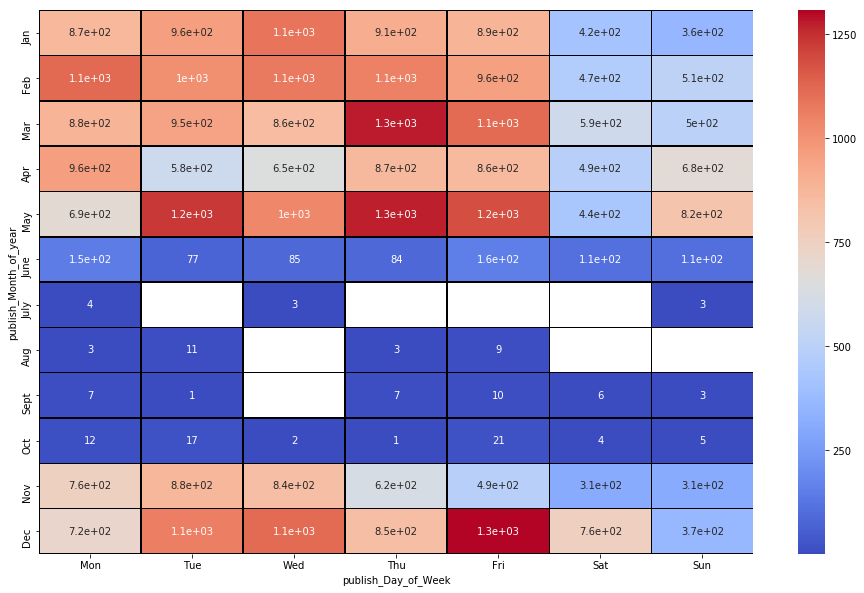

In [16]:
ylabels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June','July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
xlables = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
df_temp = data.groupby(["publish_Month_of_year", "publish_Day_of_Week"]).count()["video_id"].unstack()
plt.figure(figsize=(16,10))
ax = sns.heatmap(df_temp, cmap=cm.coolwarm, linewidths=0.5, linecolor="black", xticklabels=xlables, yticklabels=ylabels, annot=True)

# Here i'm just checking that the above map does what I think it does
it looks like it works

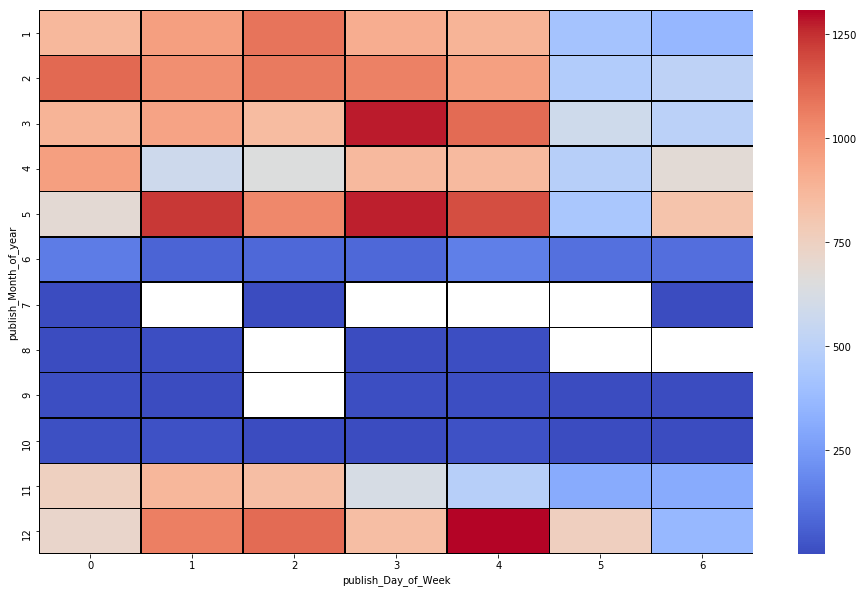

In [17]:
df_temp1 = data.groupby(["publish_Month_of_year", "publish_Day_of_Week"]).count()["video_id"].unstack()
plt.figure(figsize=(16,10))
ax = sns.heatmap(df_temp1, cmap=cm.coolwarm, linewidths=0.5, linecolor="black")

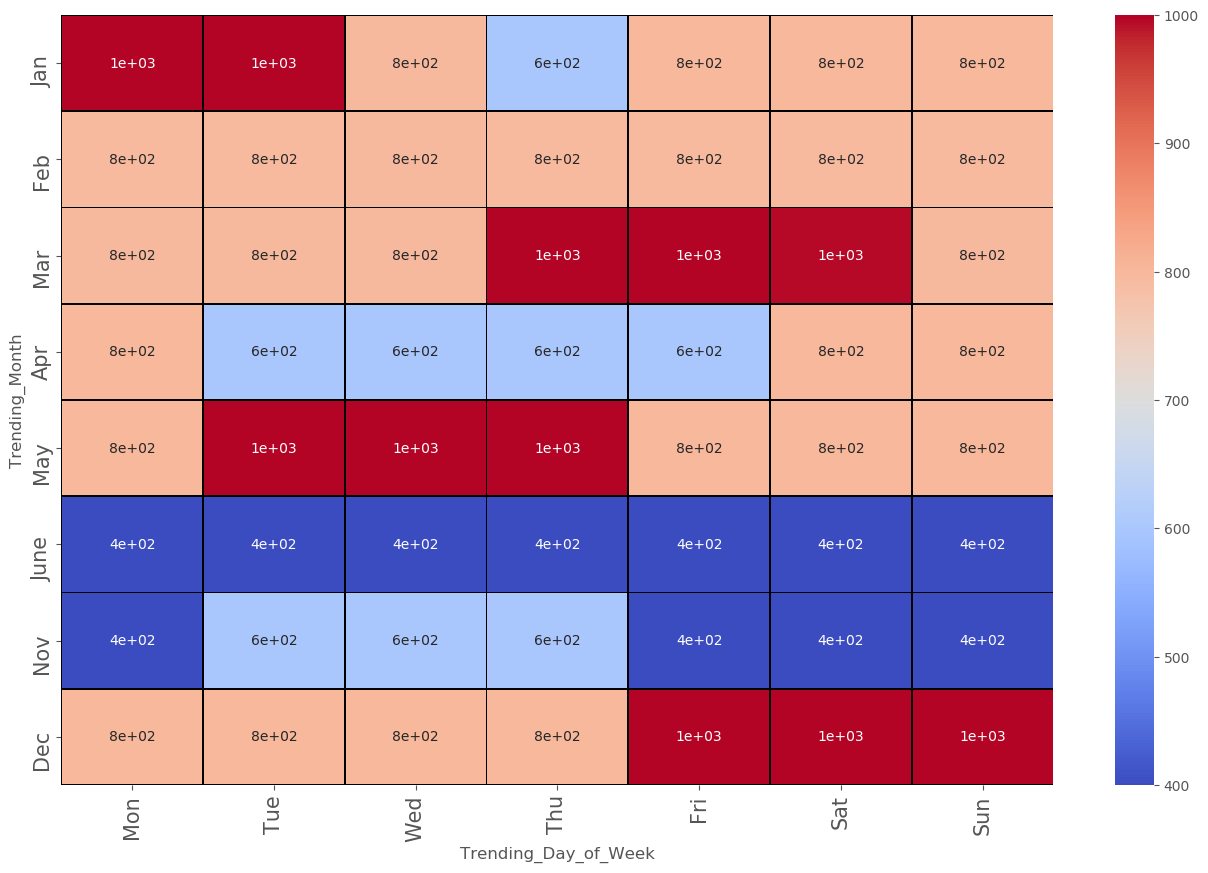

In [27]:
ylabels2 = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'Nov', 'Dec']
xlables2 = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
df_temp2 = data.groupby(["Trending_Month", "Trending_Day_of_Week"]).count()["video_id"].unstack()
plt.figure(figsize=(16,10))
plt.yticks(rotation=30, fontsize=15) 
plt.xticks(rotation=90, fontsize=15)
ax = sns.heatmap(df_temp2, cmap=cm.coolwarm, linewidths=0.5, linecolor="black", xticklabels=xlables2, yticklabels=ylabels2, annot=True)

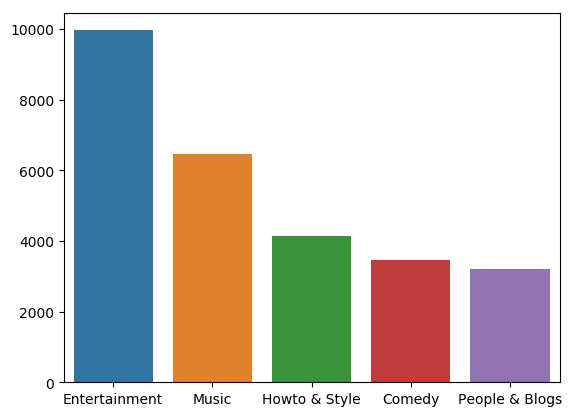

In [19]:
plt.rcdefaults()
ax = plt.subplots()
x = data.category.value_counts().head(5).index
y = data.category.value_counts().head(5).values
title = 'Top 5 Categories'
error = np.random.rand(len(x))
sns.barplot(y=y, x=x)

In [20]:
def best_videos(list, title):
    list.sort_values(by="views", ascending=False).set_index('title').head(25).plot.bar(figsize=(16,10))
    plt.yticks(rotation=60, fontsize=25) 
    plt.xticks(rotation=90, fontsize=20) 
    plt.title(title, fontsize=25)
    plt.legend(handlelength=5, fontsize  = 30)
    plt.show()

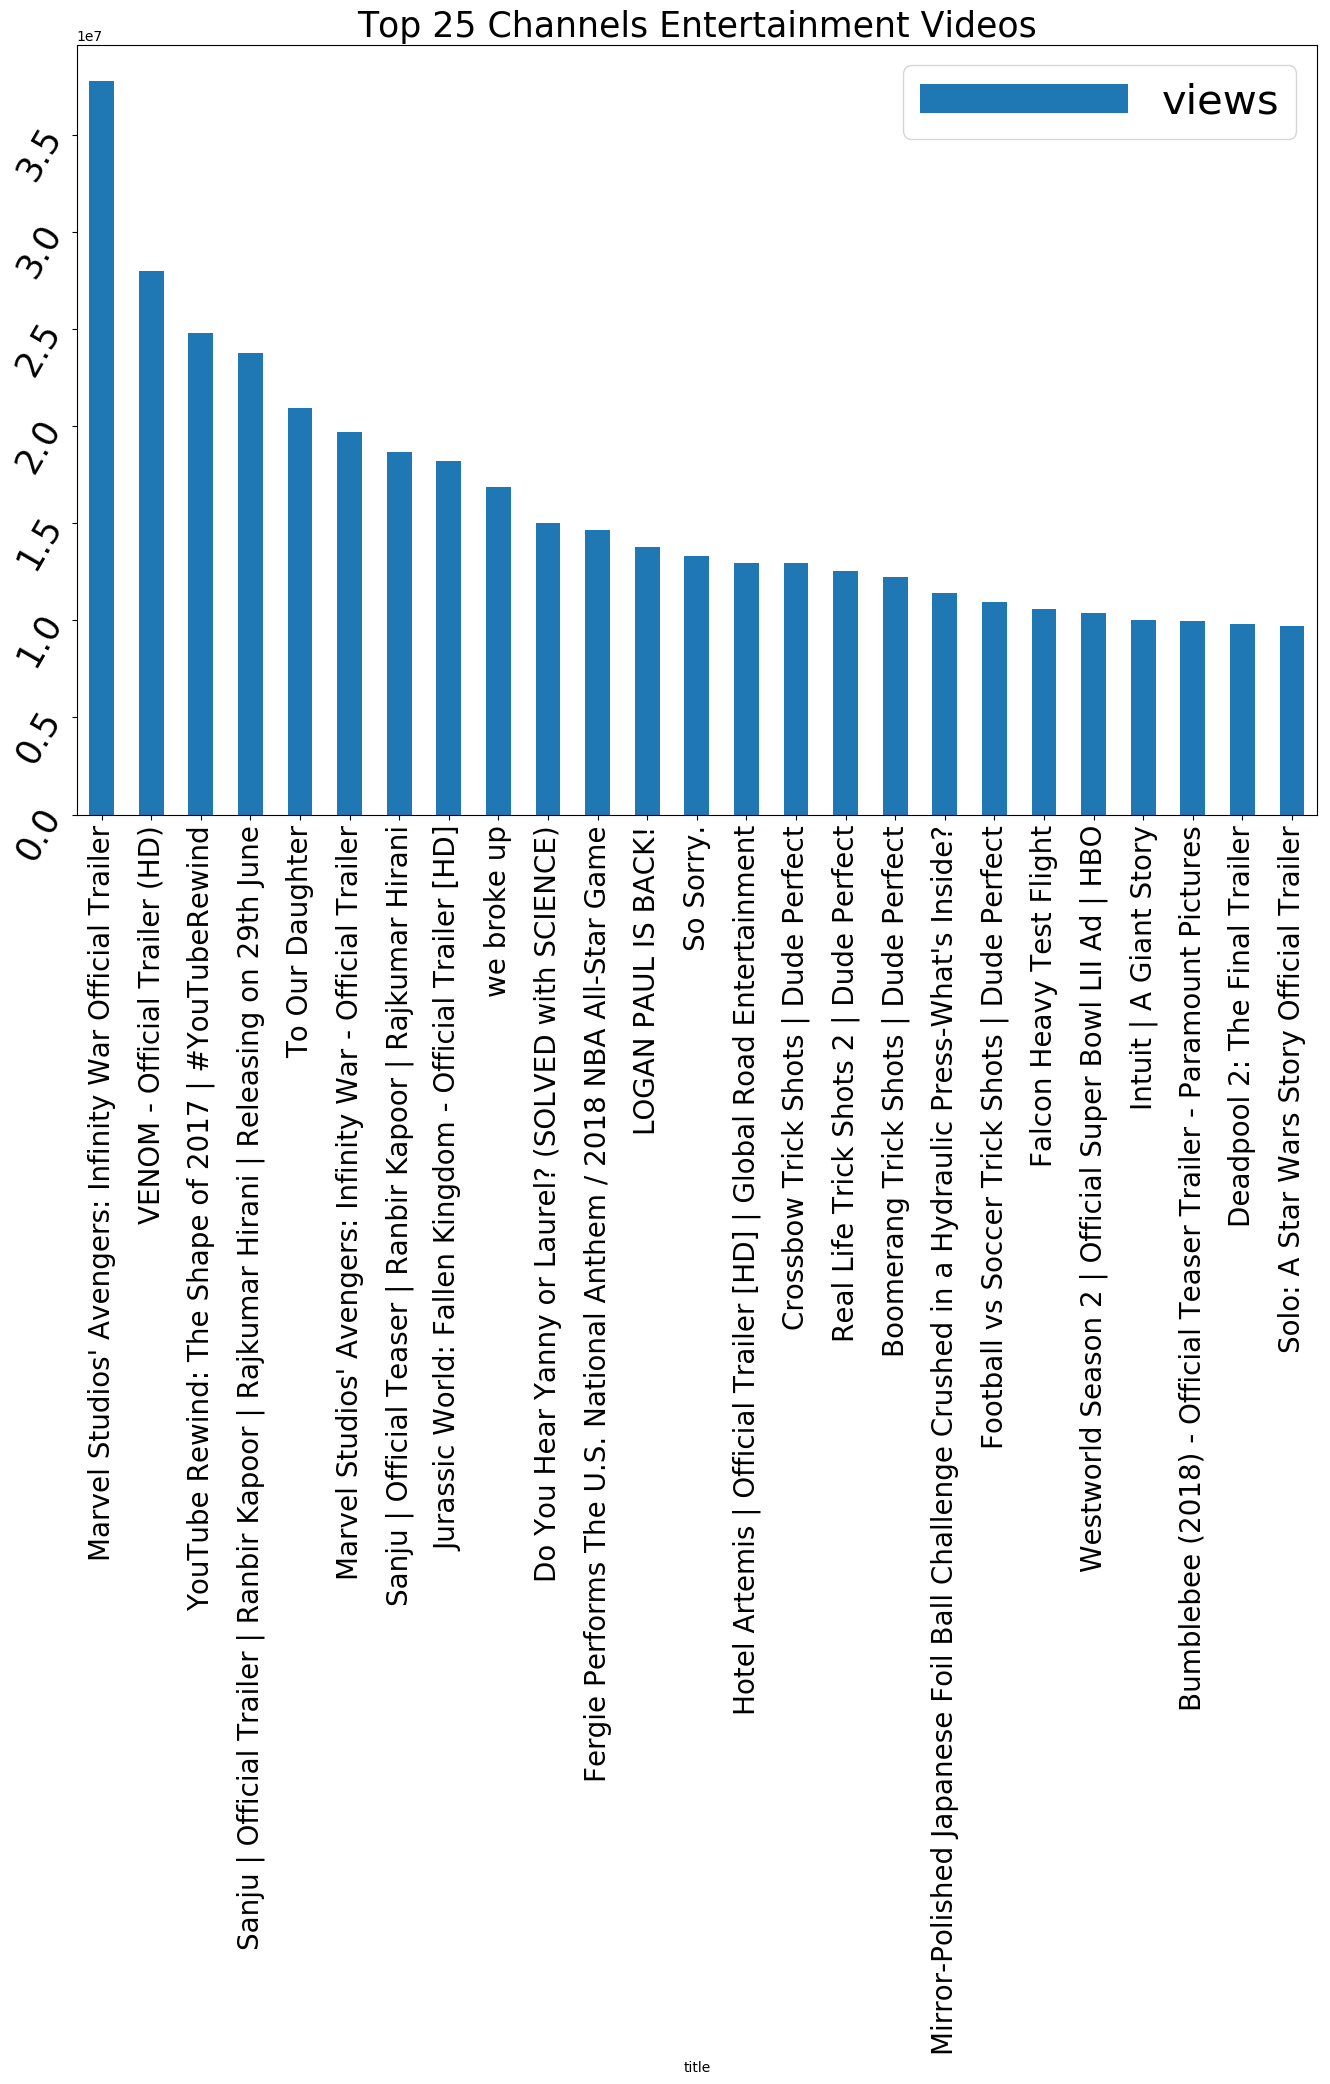

In [21]:
title = 'Top 25 Channels Entertainment Videos'
list = data[["title","views"]][data["category"] != "Music"].sort_values(by="views",ascending=False).drop_duplicates("title",keep="last")

best_videos(list, title)

# Your goals:
1.) difference between publish dates and trending dates overall
2.)reverse engineer the sentiment analysis of categories or channels

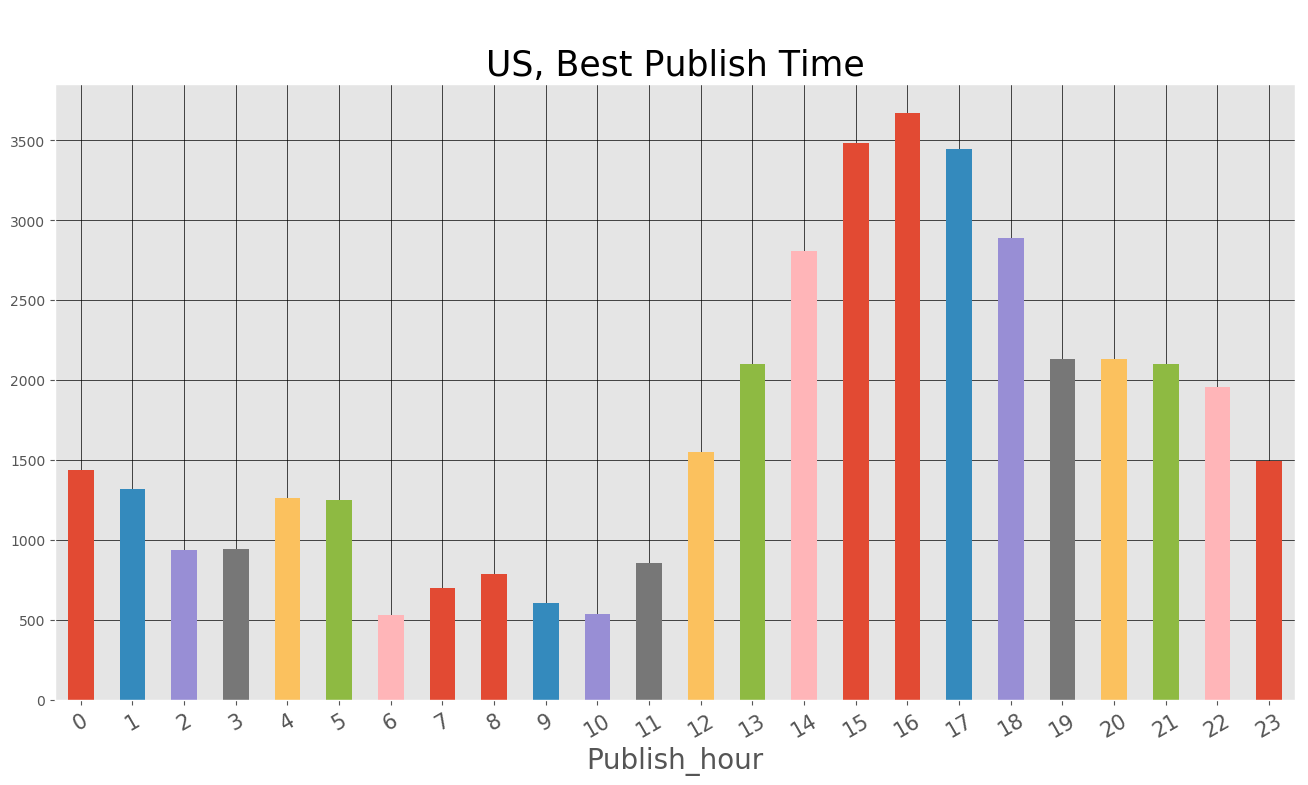

In [22]:
list = data.groupby("Publish_Hour").count()["category"]
title ="\nUS, Best Publish Time"

best_publish_time(list, title)
plt.grid(color='black', linestyle='-', linewidth=.5)

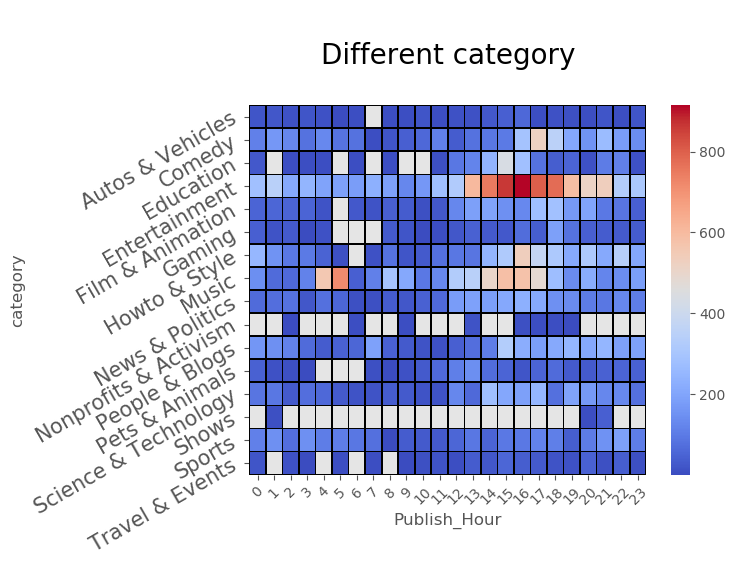

<Figure size 2000x5000 with 0 Axes>

In [26]:
listgb = data.groupby(["category","Publish_Hour"]).count()["video_id"].unstack()
ax = sns.heatmap(listgb,cmap=cm.coolwarm, linewidths=0.5, linecolor='black')
plt.yticks(rotation=30, fontsize=15) 
plt.xticks(rotation=45, fontsize=10)
plt.title("\nDifferent category\n", fontsize=20)
plt.figure(figsize=(20,50))
plt.show()

How do I get a views to like rate?

Like rate to views per top channel not music or entertainment


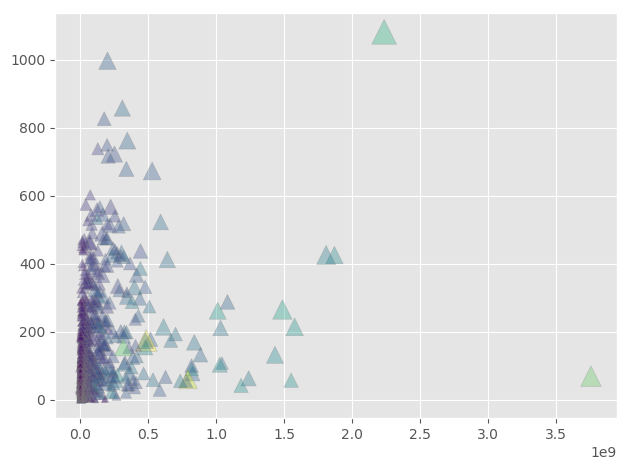

In [24]:
listgb = data[data["category"]!= "music"].groupby("channel_title").sum().sort_values(by="views",ascending=False)
x = listgb['views']
y = listgb['Like_Ratio']
color = np.cbrt(listgb['dislikes'])
size = np.cbrt(listgb["comment_count"])
fig, ax = plt.subplots()
ax.scatter(x, y, alpha=0.35, c=color, s=size, marker='^', edgecolors='grey')
ax.grid(True)
fig.tight_layout()

plt.show()

In [25]:
listgb["views"]

channel_title
ChildishGambinoVEVO                          3758488765
ibighit                                      2235906679
Dude Perfect                                 1870085178
Marvel Entertainment                         1808998971
ArianaGrandeVevo                             1576959172
MalumaVEVO                                   1551515831
jypentertainment                             1486972132
Sony Pictures Entertainment                  1432374398
FoxStarHindi                                 1238609854
BeckyGVEVO                                   1182971286
20th Century Fox                             1082872611
CalvinHarrisVEVO                             1042564430
Ed Sheeran                                   1032288961
Cardi B                                      1026247756
TaylorSwiftVEVO                              1010955662
Universal Pictures                            883707419
ZaynVEVO                                      838561451
Disney•Pixar                      